In [1]:
import pandas as pd

In [22]:
import numpy as np
import matplotlib as plt
%matplotlib inline

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
df.Time.value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [23]:
print(df[df['Time'] ==26].head(4))

    Time        V1        V2        V3        V4        V5        V6  \
32  26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33  26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34  26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35  26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   

          V7        V8        V9  ...       V21       V22       V23       V24  \
32  0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548  0.001031   
33  0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548  0.001031   
34  0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108  0.000753   
35  0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108  0.000753   

         V25       V26       V27       V28  Amount  Class  
32  0.098816 -0.552904 -0.073288  0.023307    6.14      0  
33  0.098816 -0.552904 -0.073288  0.023307    6.14      0  
34  0.098117 -0.553471 -0.078306  0.025427    1.77   

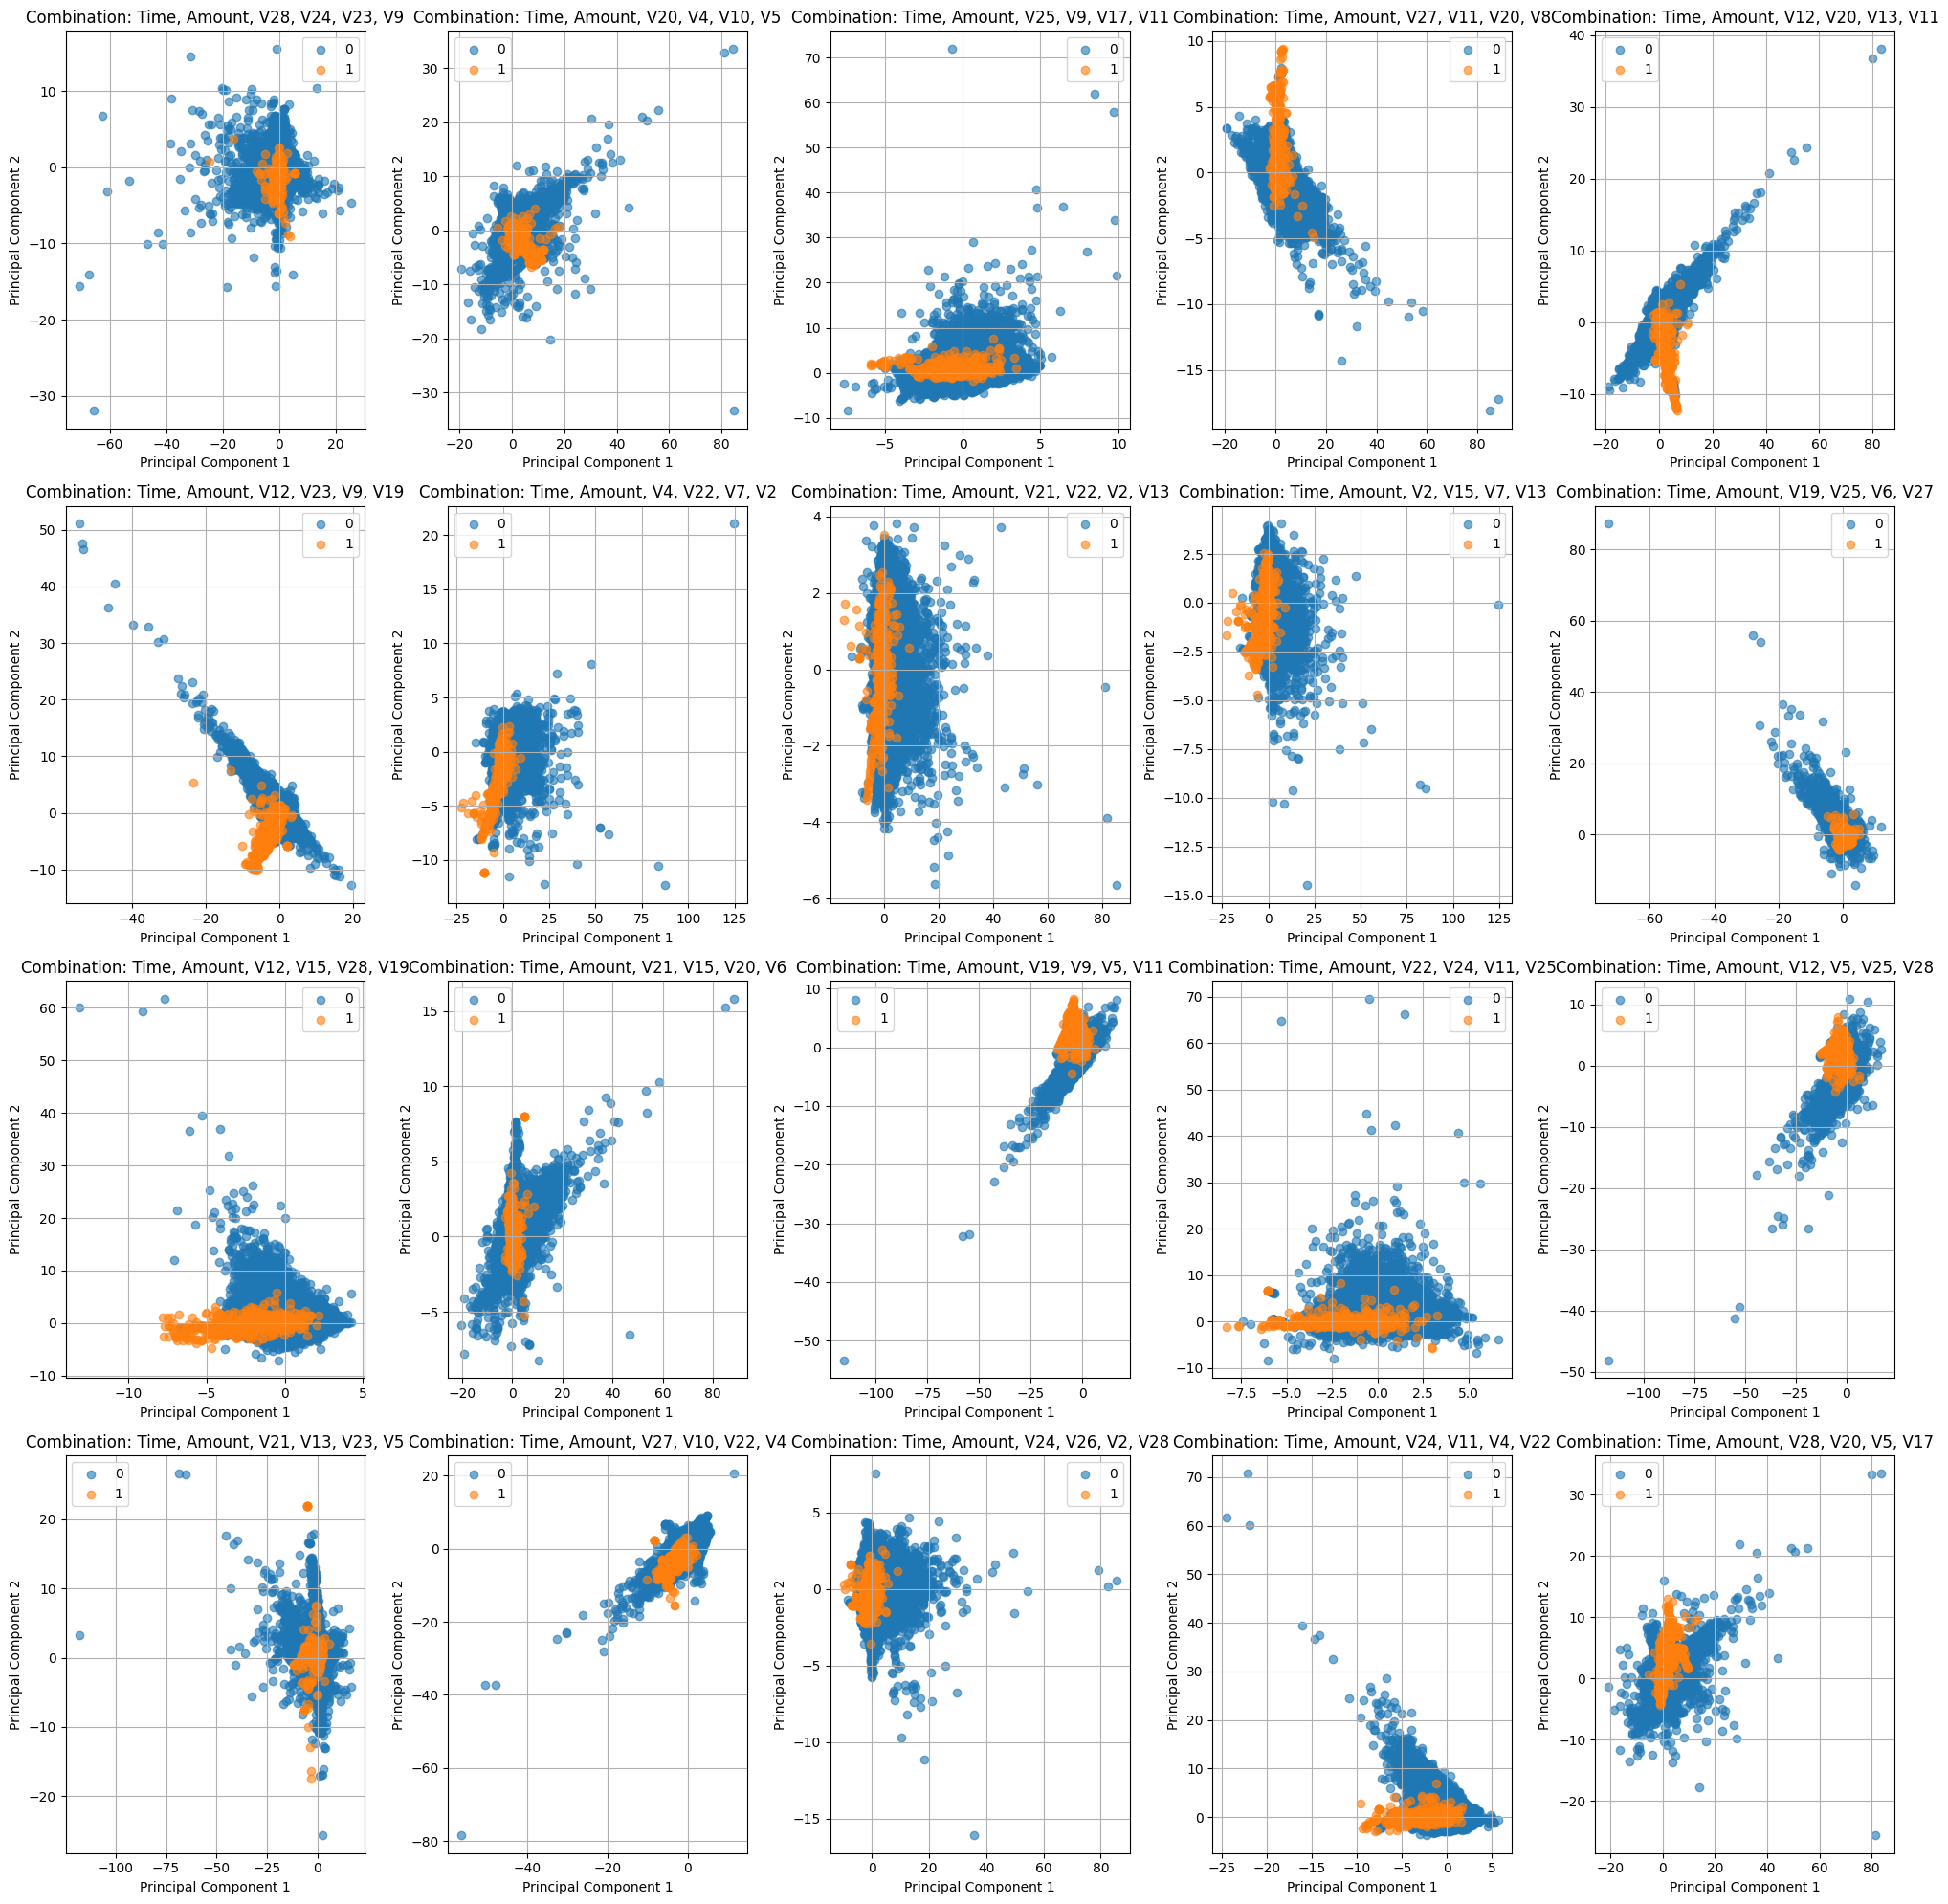

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random
columns_to_use = ['V{}'.format(i) for i in range(1, 29)]

# Generating 10 random permutations of length 4
permutations = [['Time', 'Amount'] + random.sample(columns_to_use, 4) for _ in range(20)]

# Create subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
axes = axes.ravel()

for i, comb in enumerate(permutations):
    # Standardize the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[comb])
    
    # Apply PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df_scaled)

    # Plot the data
    df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    df_pca['Class'] = df['Class']

    for label in df_pca['Class'].unique():
        subset = df_pca[df_pca['Class'] == label]
        axes[i].scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.6)

    axes[i].set_title('Combination: {}'.format(', '.join(comb)))
    axes[i].set_xlabel('Principal Component 1')
    axes[i].set_ylabel('Principal Component 2')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [25]:
df_temp1 = df[['Time', 'Amount', 'V28', 'V4', 'V2', 'V18']].copy()

In [26]:
df_temp2 = df[['Time', 'Amount', 'V12', 'V9', 'V28', 'V27']].copy()

In [27]:
df_temp3 = df[['Time', 'Amount', 'V21', 'V9', 'V17', 'V4', 'V2', 'V7', 'V25', 'V19', 'V20', 'V8', 'V15', 'V11', 'V16', 'V12', 'V18', 'V5']].copy()

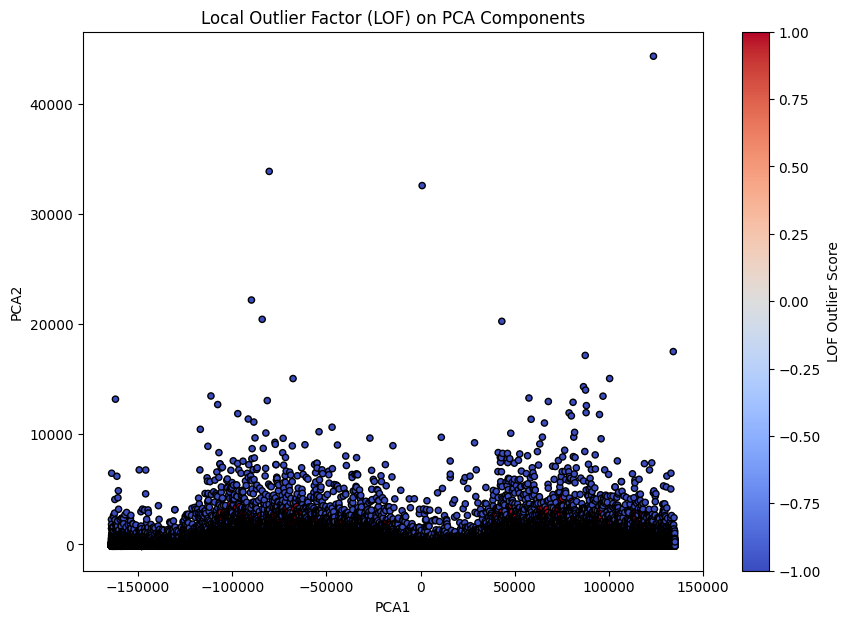

In [30]:
from sklearn.neighbors import LocalOutlierFactor
pca_result = pca.fit_transform(df_temp3)
df_temp3['PCA1'] = pca_result[:, 0]
df_temp3['PCA2'] = pca_result[:, 1]

# Step 3: Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
df_temp3['LOF'] = lof.fit_predict(df_temp3[['PCA1', 'PCA2']])
df_temp3['LOF_Score'] = lof.negative_outlier_factor_

# Step 4: Plot the results
plt.figure(figsize=(10, 7))

# Scatter plot of PCA1 vs PCA2 colored by LOF outlier status
plt.scatter(df_temp3['PCA1'], df_temp3['PCA2'], c=df_temp3['LOF'], cmap='coolwarm', edgecolor='k', s=20)

# Labeling the plot
plt.title('Local Outlier Factor (LOF) on PCA Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='LOF Outlier Score')

plt.show()
 